In [5]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass

redshift = 3

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [18]:
# axes limits
timerange=2
age_lim = [0, timerange]
FeH_lim = [-2.0, 1.0]
MgFe_lim = [0, 1]
r_lim = [0, 5]
sfr_lim = [0, 0.25]


# [Fe/H]

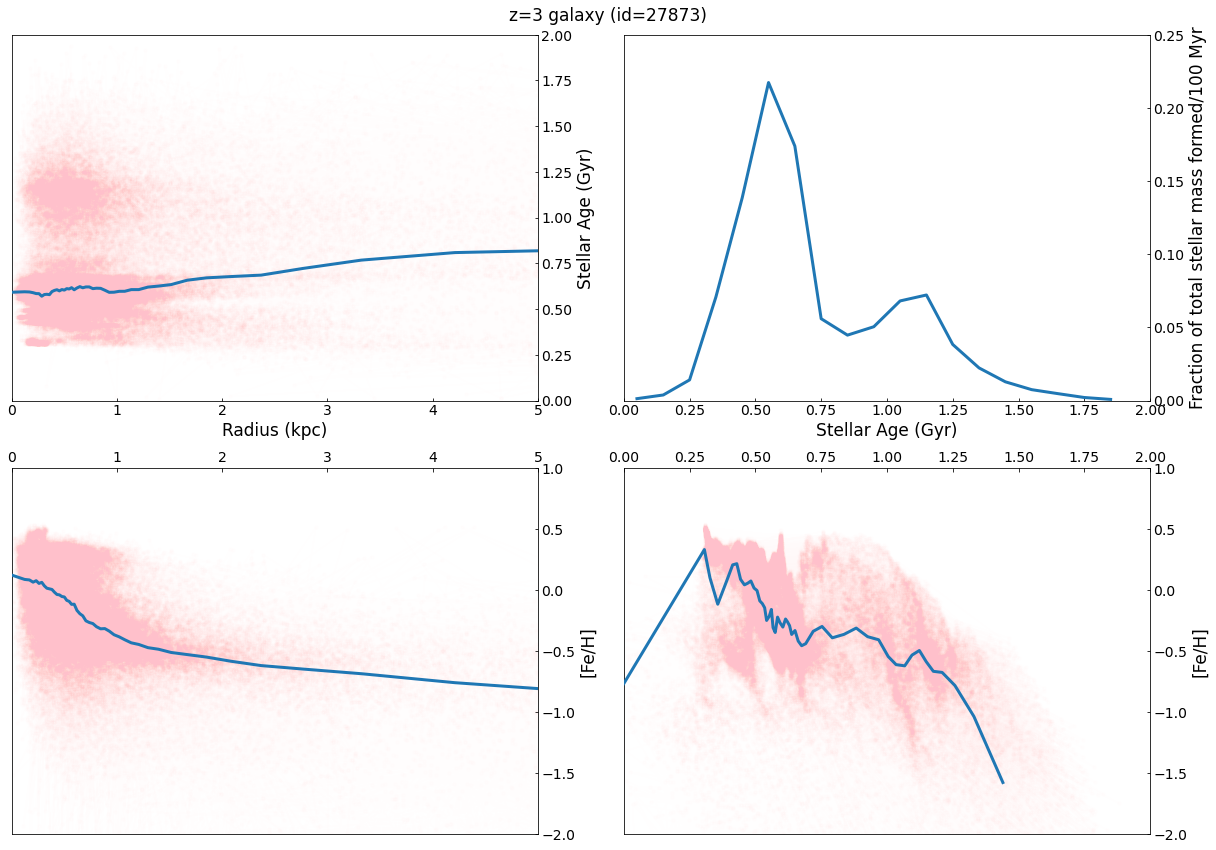

In [19]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(0)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logFeH, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='age')
yy2, logFeH, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logFeH, logFeH]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Fe/H]', '[Fe/H]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

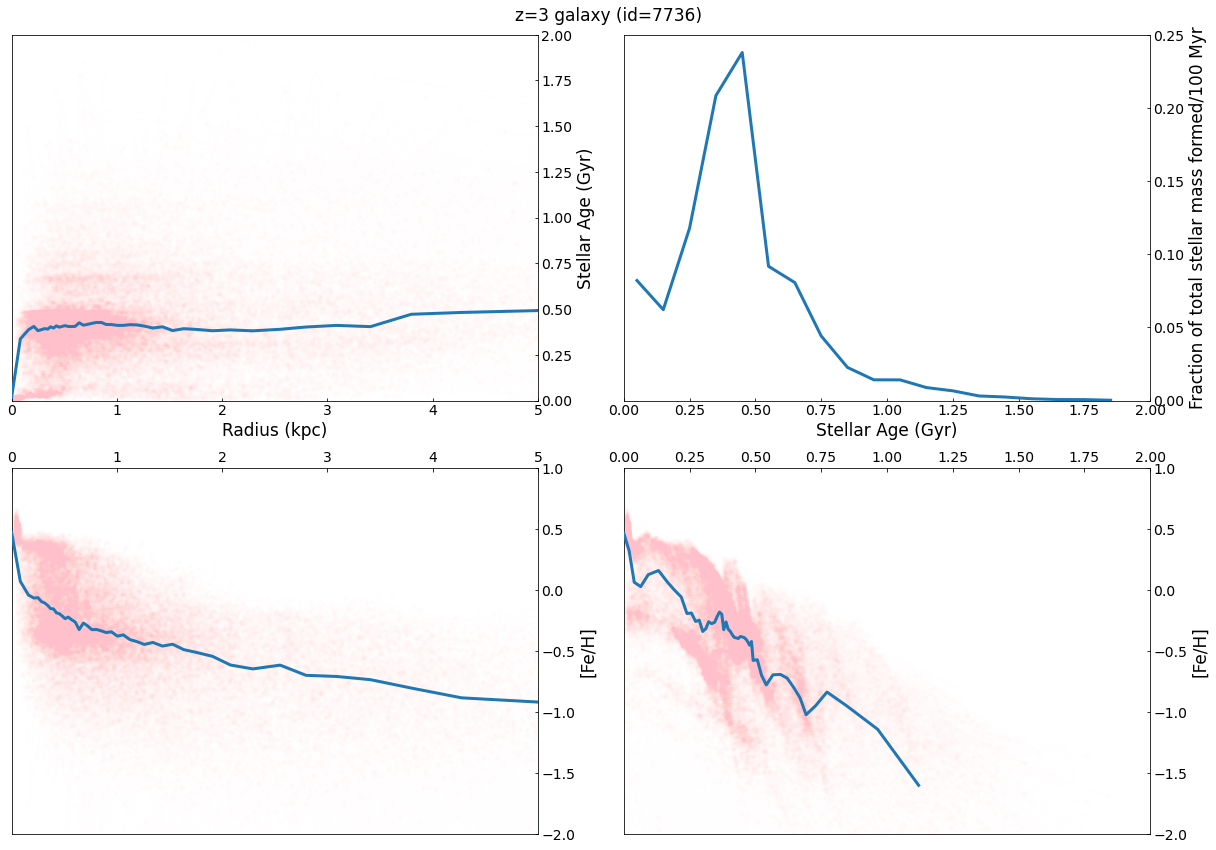

In [20]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(1)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logFeH, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='age')
yy2, logFeH, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logFeH, logFeH]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Fe/H]', '[Fe/H]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

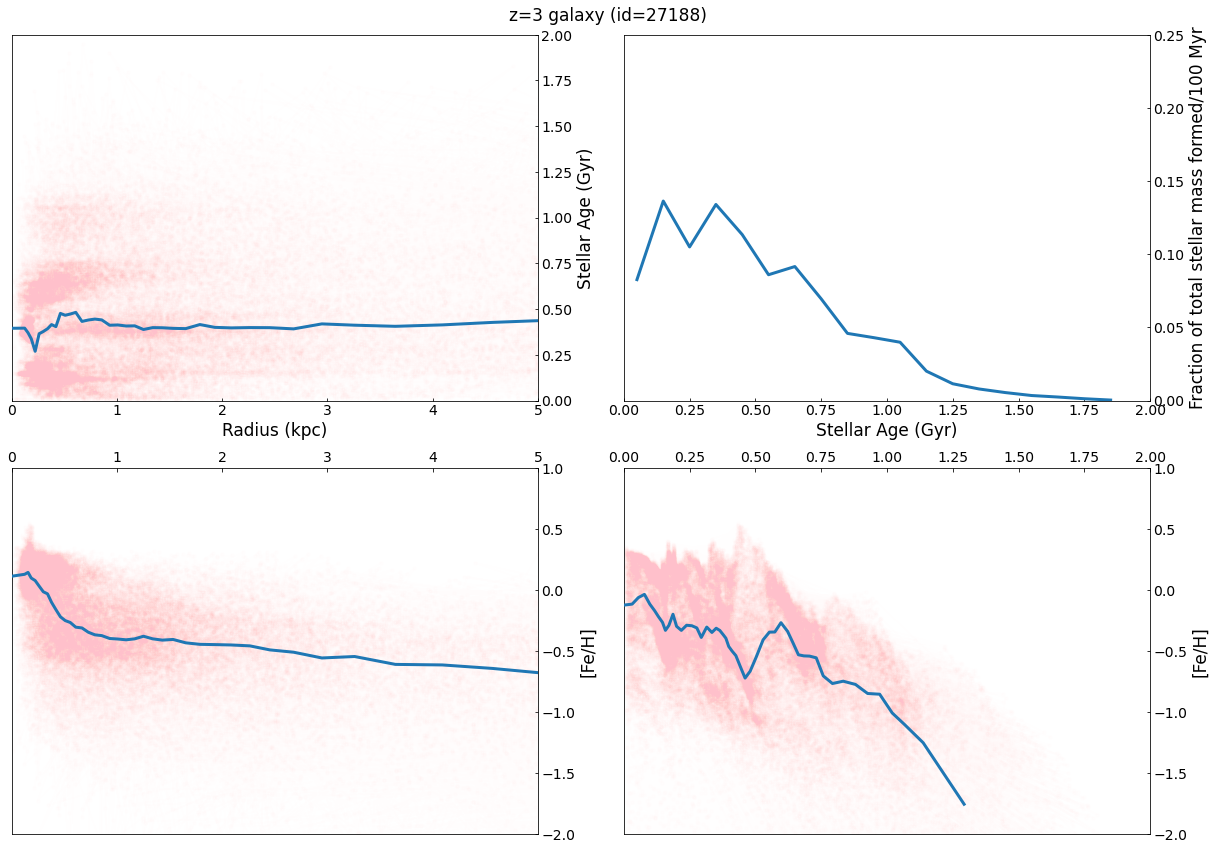

In [21]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(2)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logFeH, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='age')
yy2, logFeH, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logFeH, logFeH]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Fe/H]', '[Fe/H]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

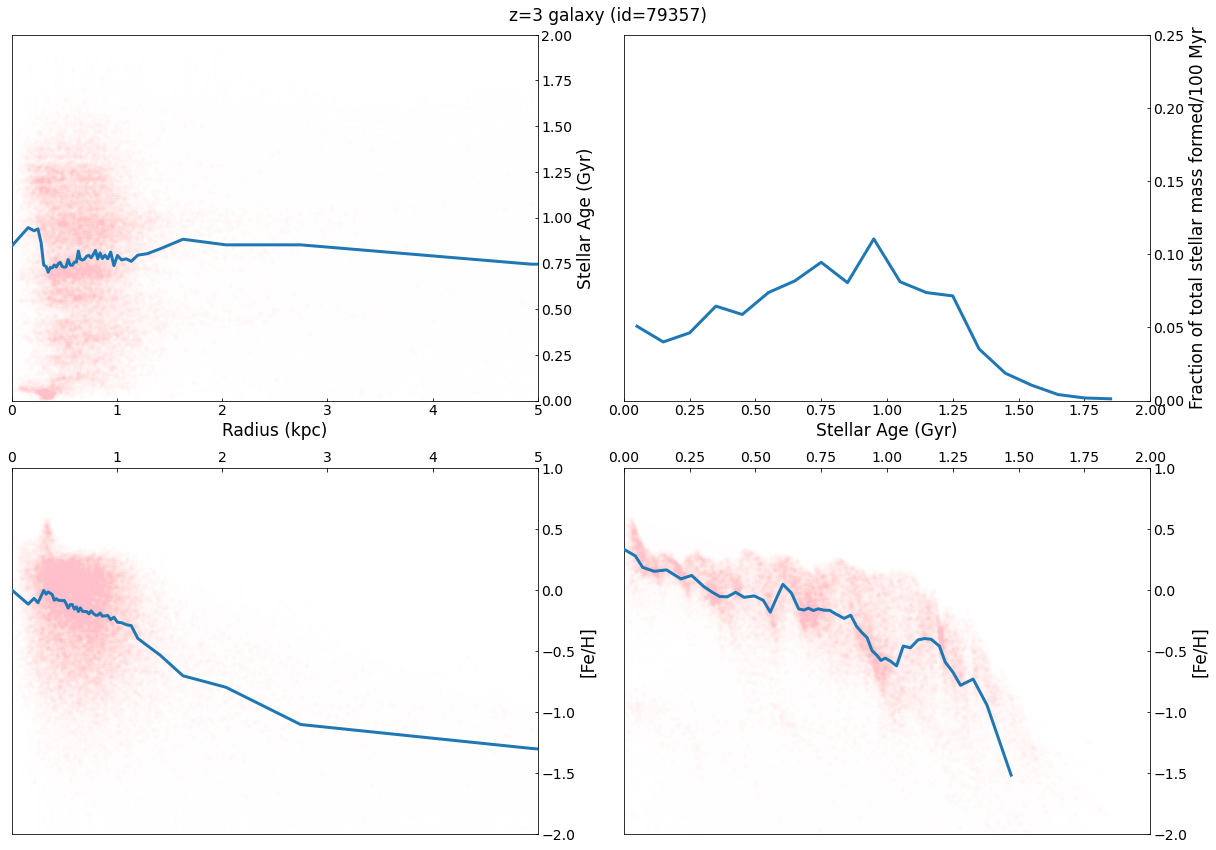

In [22]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(3)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logFeH, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='age')
yy2, logFeH, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logFeH, logFeH]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Fe/H]', '[Fe/H]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

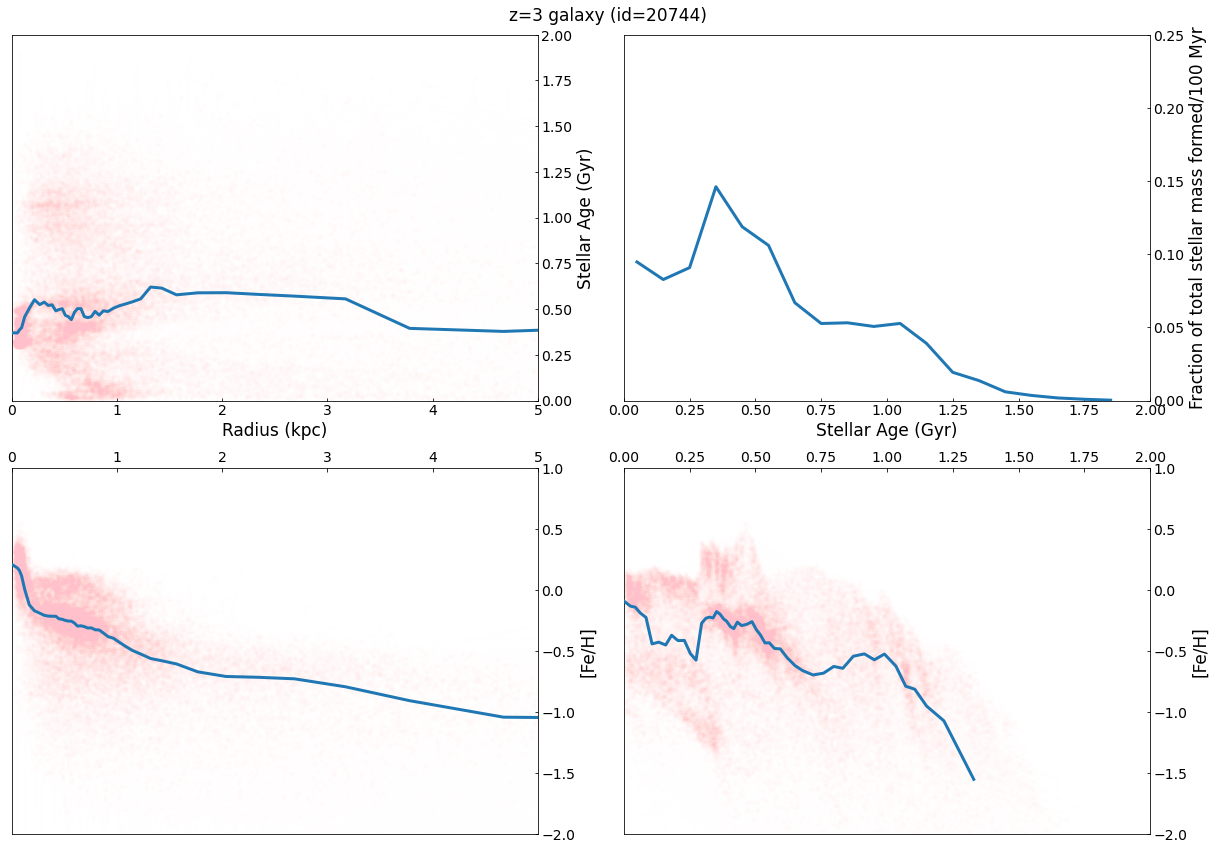

In [23]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(4)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logFeH, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='age')
yy2, logFeH, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logFeH, logFeH]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Fe/H]', '[Fe/H]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(FeH_lim[0], FeH_lim[1])
    
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

# [Mg/Fe]

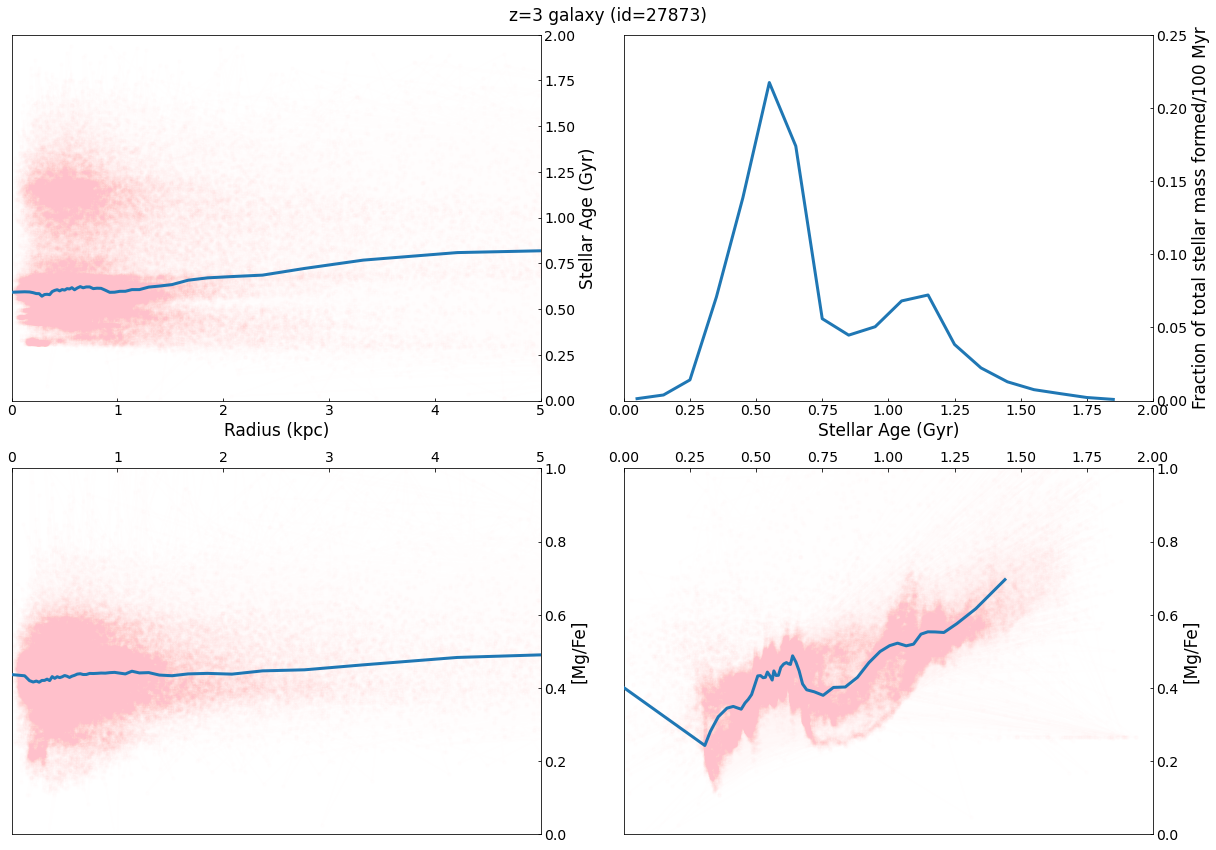

In [25]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(0)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logratio, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='age')
yy2, logratio, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logratio, logratio]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Mg/Fe]', '[Mg/Fe]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

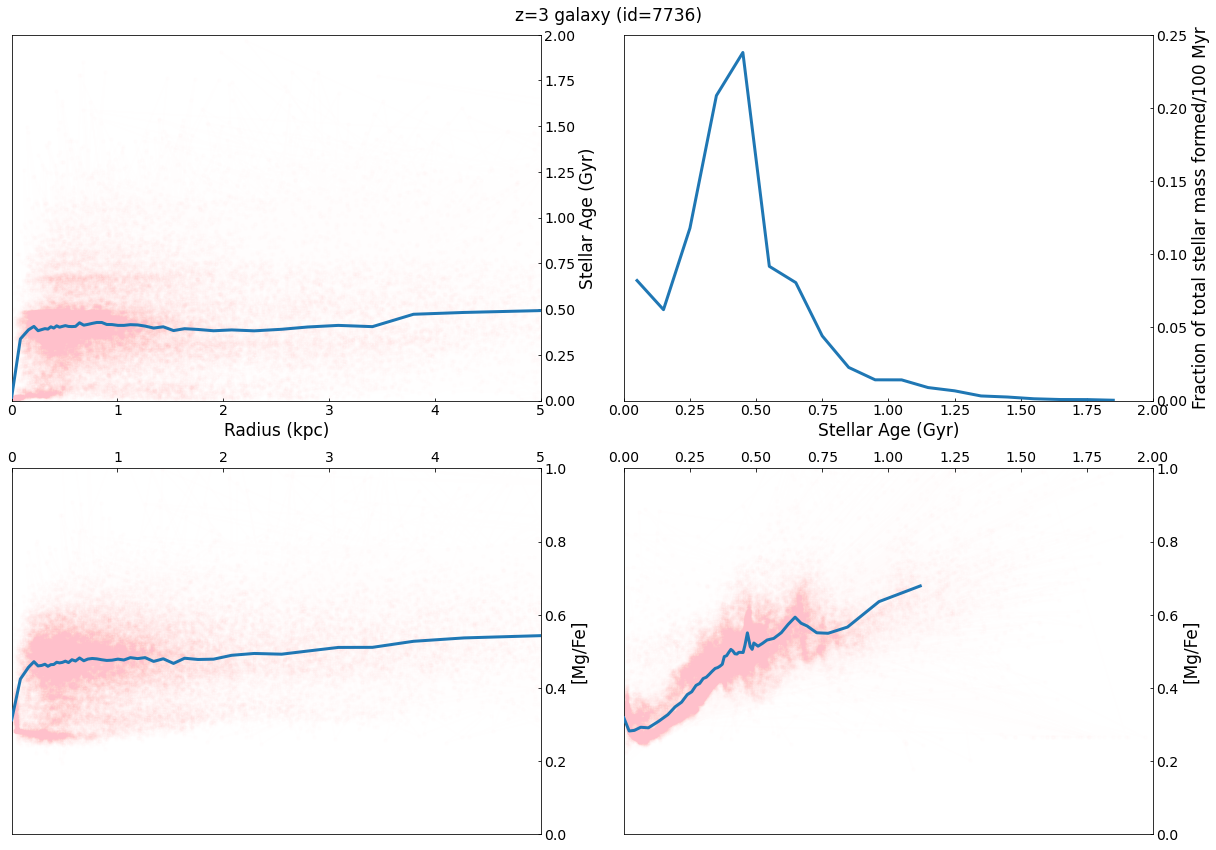

In [26]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(1)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logratio, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='age')
yy2, logratio, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logratio, logratio]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Mg/Fe]', '[Mg/Fe]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

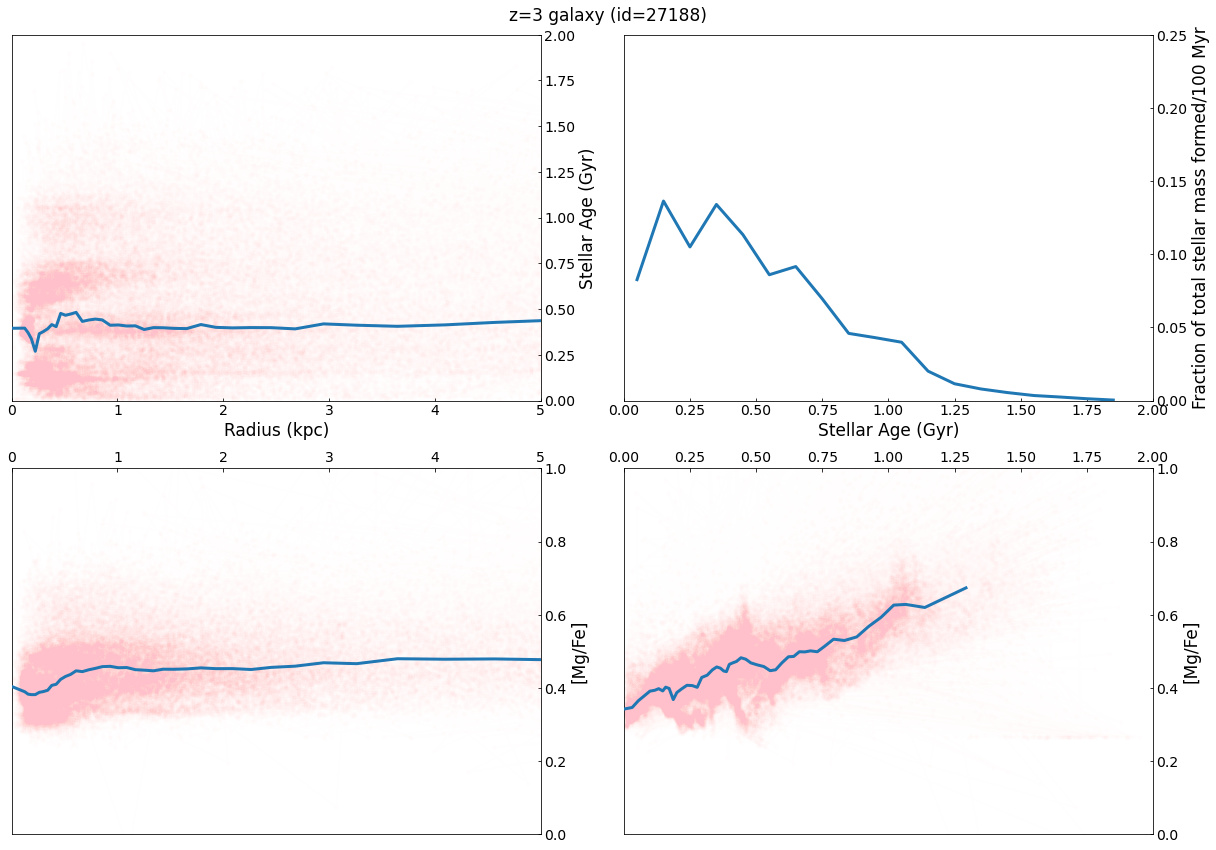

In [27]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(2)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logratio, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='age')
yy2, logratio, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logratio, logratio]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Mg/Fe]', '[Mg/Fe]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

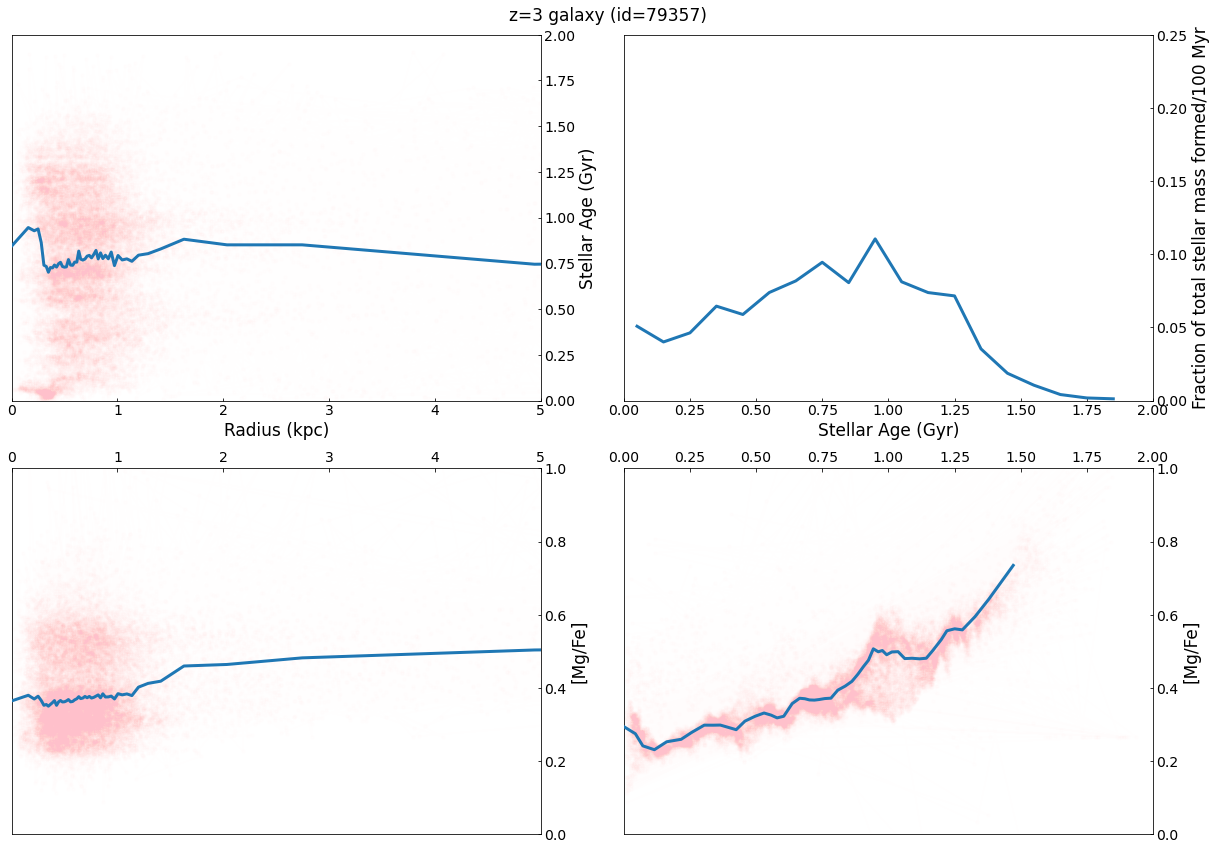

In [28]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(3)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logratio, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='age')
yy2, logratio, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logratio, logratio]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Mg/Fe]', '[Mg/Fe]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)

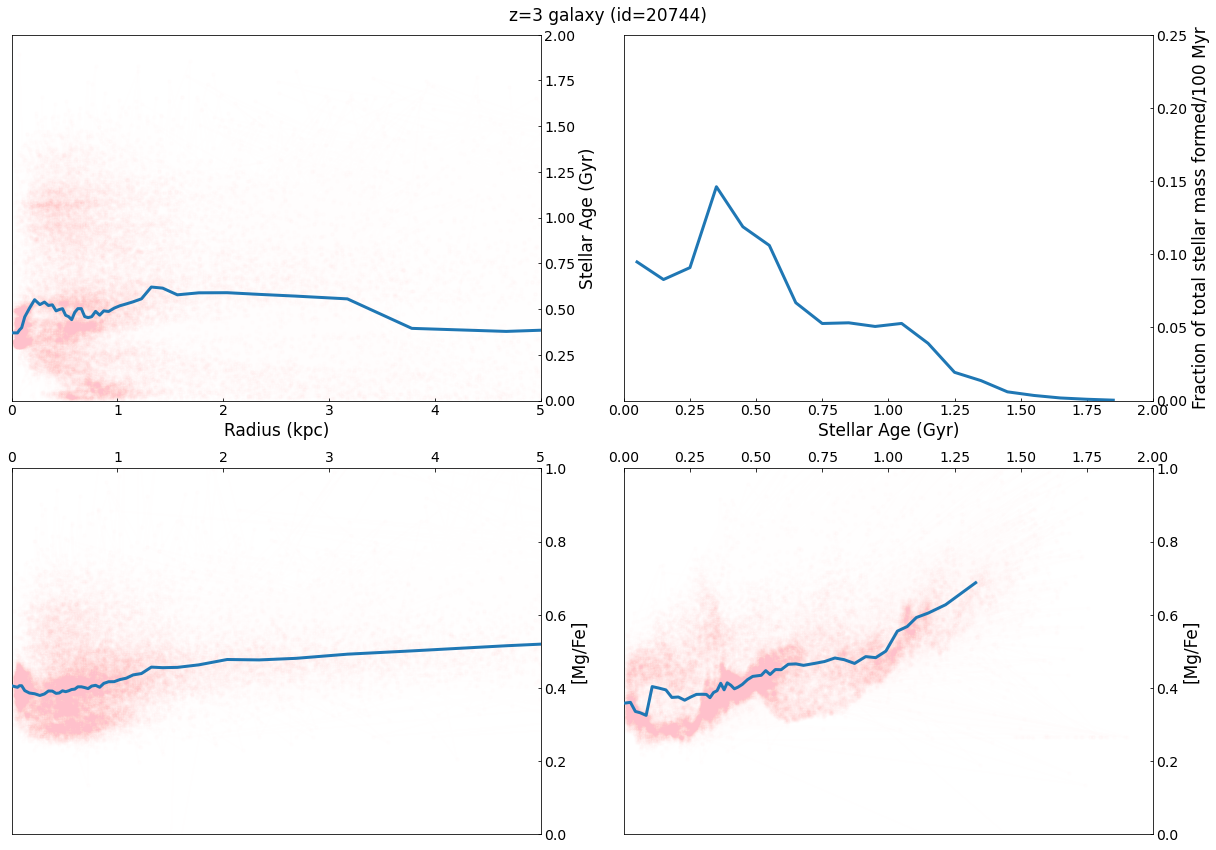

In [29]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

fig = plt.figure(1,figsize=(17,12)) #change until looks square
fig.clf()
markersize = 4
fts = 17
fts_s = 14

n_bins = 50
binwidth = 0.1
np.random.seed(4)
id = np.random.choice(ids)

gs0 = gridspec.GridSpec(2, 2)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
yy0, xx0 = age_profile(id=id, redshift=redshift, n_bins=n_bins)
yy3, logratio, xx3, age = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='age')
yy2, logratio, xx2, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='magnesium', den='iron', axis='distance')
xx1, SFH = get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=binwidth, timerange=timerange)
yy1 = SFH/np.sum(SFH)

xx = [xx0, xx1, xx2, xx3]
yy = [yy0, yy1, yy2, yy3]
xxx = [R, 0, R, age]
yyy = [age, 0, logratio, logratio]
# xlim = [M_lim, logRe_lim, MRe_lim]
# ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['Radius (kpc)', 'Stellar Age (Gyr)', 'Radius (kpc)', 'Stellar Age (Gyr)']
ylabel = ['Stellar Age (Gyr)', 'Fraction of total stellar mass formed/100 Myr', '[Mg/Fe]', '[Mg/Fe]']
# title = ['Star-forming z='+str(redshift)+' galaxy ', 'Young quiescent z='+str(redshift)+' galaxy ', 
#          'Intermediate quiescent z='+str(redshift)+' galaxy ', 'Old quiescent z='+str(redshift)+' galaxy ']

for m in range(4):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[m])

for m in range(4):
    ax = plt.subplot(gs[m][0])
        
    ax.plot(xx[m], yy[m], linewidth=3, zorder=4)
    ax.plot(xxx[m], yyy[m], 'pink', marker='.', alpha=0.01)
    
    if m == 0:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(age_lim[0], age_lim[1])
    elif m == 1:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.xaxis.set_label_position('bottom')
        ax.yaxis.set_label_position('right')
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(sfr_lim[0], sfr_lim[1])
    elif m ==2:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=True, bottom=False, left=False, right=True)
        ax.yaxis.set_label_position('right')
        ax.yaxis.tick_right()
        ax.set_ylabel(ylabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.set_xlim(r_lim[0], r_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
    else:
        ax.tick_params(labelsize=fts_s, direction='in', which='both', top=False, bottom=True, left=False, right=True)
        ax.set_ylabel(ylabel[m], fontsize=fts)
        #ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right')
        ax.set_xlim(age_lim[0], age_lim[1])
        ax.set_ylim(MgFe_lim[0], MgFe_lim[1])
        
fig.suptitle('z='+str(redshift)+' galaxy (id='+str(id)+')', fontsize=fts)
fig.tight_layout()

#plt.savefig('FIGURES\individual.png', dpi=400)